In [96]:
# read the csv files 
import pandas as pd
import sys, os, re, glob
import numpy as np

from scipy.interpolate import splev, splrep

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from matplotlib import pylab
#import seaborn as sns

import seaborn as sns

sns.set(style="ticks")
sns.set_context("poster")

dataset = pd.read_csv("data_irps.csv",sep=",", index_col=None) # read info from csv file

resistance = pd.DataFrame() # create the data frame 
resistance = dataset

resistance
V_m=resistance.Vm # Voltages from DMV (digital multmeter)
I_m=resistance.Im # Currents from DMV (digital multmeter)

V_s=resistance.Vs # Voltages from source 
I_s=resistance.Is # Currents from source 

V_m,I_m,V_s,I_s

V_i=V_s-V_m  # Voltage drop due to source internal resistance 
resistance['Vi']=V_i

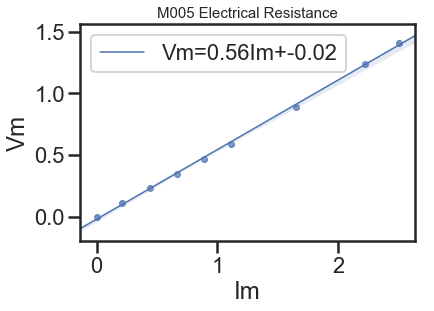

M005 Resistance: 0.56 +/- 0.01 Ohms


In [102]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(I_m,V_m)

# use line_kws to set line label for legend
ax = sns.regplot(x="Im", y="Vm", data=resistance, color='b',marker=".", 
 line_kws={"linewidth": 1.5,'label':"Vm={0:.2f}Im+{1:.2f}".format(slope,intercept)})

pylab.title('M005 Electrical Resistance',fontsize=15)
# plot legend
ax.legend()
plt.show()
 #slope and std_err are the Mock module resistance and its error
print "M005 Resistance: %.2f +/- %.2f Ohms" %(slope,std_err) 


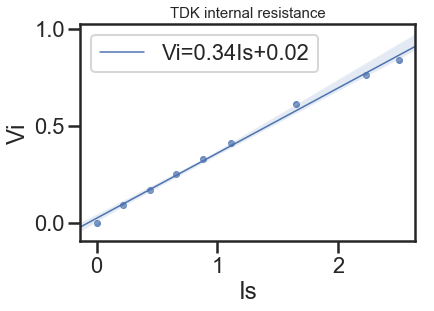

TDK Z+ Internal Resistance: 0.34 +/- 0.01 Ohms


In [104]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(I_s,V_i)

# use line_kws to set line label for legend
ax2 = sns.regplot(x="Is", y="Vi", data=resistance, color='b',marker=".", 
 line_kws={"linewidth": 1.5,'label':"Vi={0:.2f}Is+{1:.2f}".format(slope,intercept)})

pylab.title('TDK internal resistance',fontsize=15)
# plot legend
ax2.legend()
plt.show()
 #slope and std_err are the source internal resistance and its error
print "TDK Z+ Internal Resistance: %.2f +/- %.2f Ohms" %(slope,std_err)  

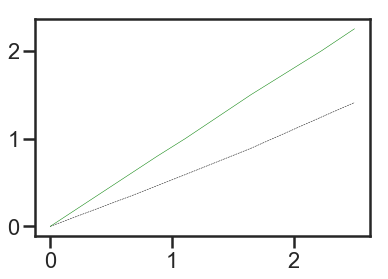

In [9]:

plt.plot(resistance.Im, resistance.Vm, lw=0.5, label='DMV',color='black', linestyle='dashed')
plt.plot(resistance.Is, resistance.Vs, lw=0.5, label='Source',color='green', linestyle='solid')



In [8]:
# Save to pdf/png
outfile = os.path.join(outdir, os.path.splitext(os.path.basename(inputfile))[0])
plt.savefig("%s.pdf"%outfile, bbox_inches='tight')
plt.savefig("%s.png"%outfile, bbox_inches='tight', dpi=300)
print "...saved plots in %s.pdf/.png" % outfile


...saved plots in plots/limits_April_30_18/combineLogStats_cp.pdf/.png
